<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
from scipy.stats import entropy
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np
import matplotlib as plt

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [4]:
plt.rcParams.update({'font.size': 25})

<h1>Define functions and thresholds</h1>

In [5]:
measures = [sim.pearson_correlation_abs, sim.mutual_information, comp.invert(sim.manhattan_distance)]

In [6]:
value_threshold = 0.5

In [7]:
agreement_threshold = 0.2

In [8]:
agreement_func = np.std

In [9]:
combination_func = np.mean

In [10]:
scaling = comp.binning_to_100_bins

<h2>Compute agreement mask</h2>

In [11]:
mask = calc.calculate_filtered_agreement_areas(u_l30, qbo_equator, measures, value_threshold, agreement_threshold, combination_func=combination_func, agreement_func=agreement_func, scaling_func=scaling)

<h2>Compute Pearson's Correlation</h2>

In [12]:
pearson_map = calc.calculate_series_similarity(u_l30, qbo_equator, sim_func=sim.pearson_correlation)

<h2>Apply mask on map</h2>

In [13]:
filtered_pearson_map = calc.apply_mask_on_map(pearson_map, mask)

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:753: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


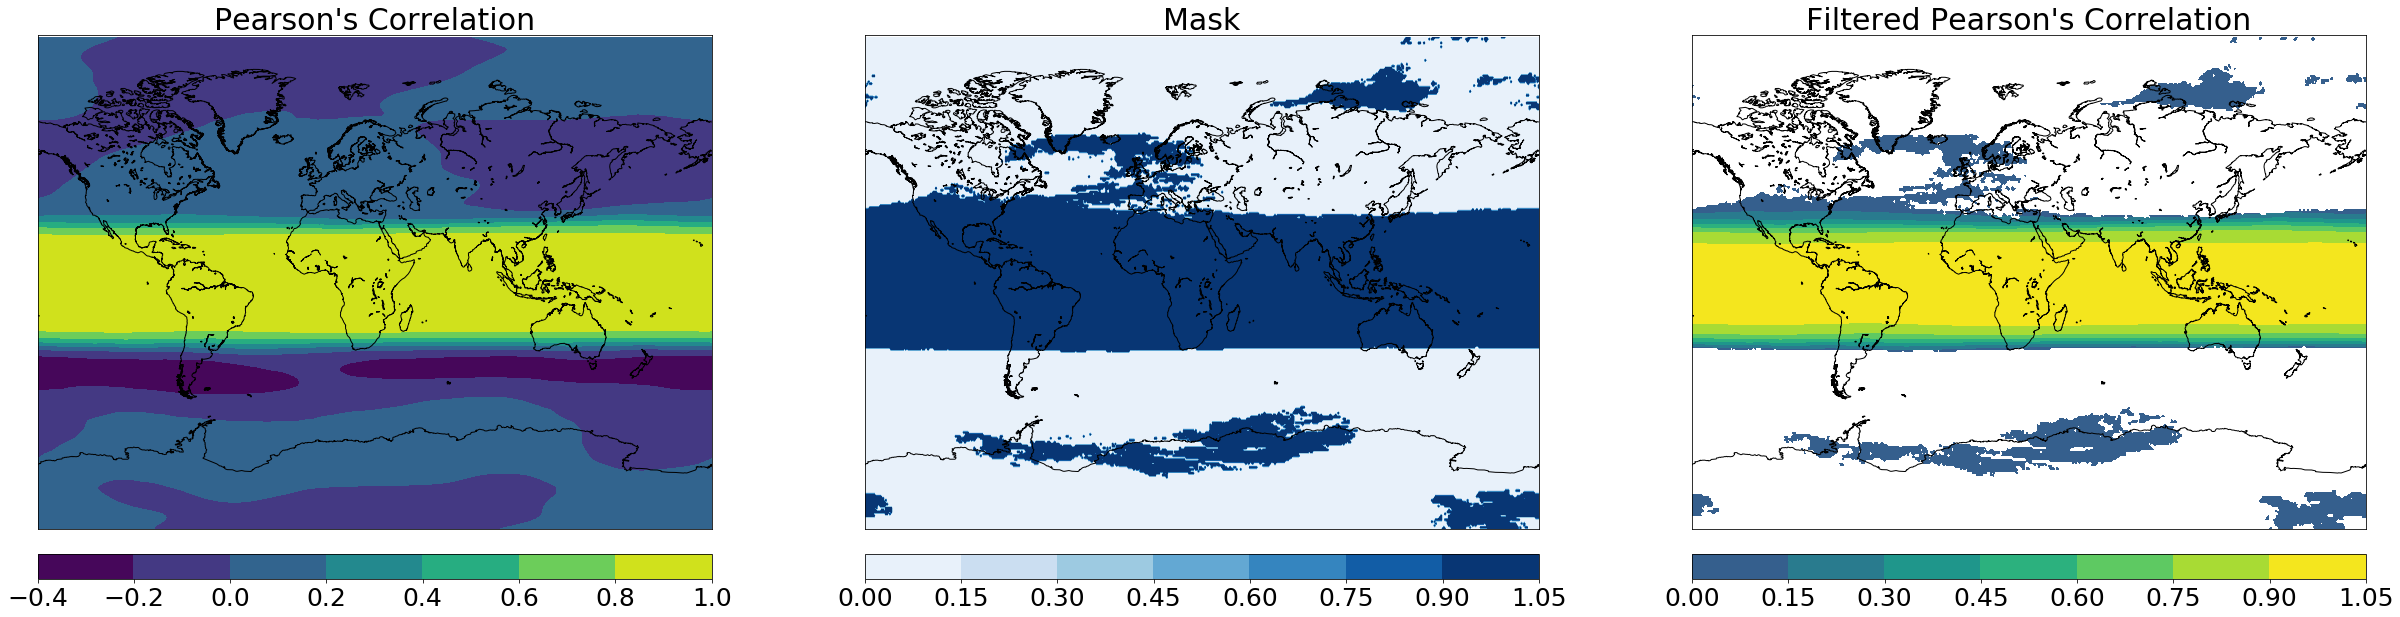

In [14]:
fig, ax = plt.pyplot.subplots(1, 3, figsize=(42, 10))
plots.plot_map(pearson_map, ax[0])
plots.plot_map(mask, ax[1], cmap=plt.cm.get_cmap("Blues"))
plots.plot_map(filtered_pearson_map, ax[2], overwrite_colorbar_boundaries=True, colorbar_min=np.min(pearson_map), colorbar_max=1)
titles = ["Pearson's Correlation", "Mask", "Filtered Pearson's Correlation"]
plots.annotate(ax, column_labels=titles, column_count=3)